In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/alfiyaansari/Desktop/Project/Germany e-commerce data.xlsx')

In [3]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [4]:
df.shape

(100000, 14)

In [5]:
df.describe()

,order_item_id,order_date,delivery_date,item_id,brand_id,item_price,user_id,user_dob,user_reg_date,return
count,100000.000000,100000,90682,100000.000000,100000.000000,100000.000000,100000.000000,91275,100000,100000.000000
mean,50000.500000,2016-07-29 13:49:42.815999744,2016-05-06 01:34:39.521845504,923.781820,30.149020,65.064695,27169.073960,1964-04-06 10:53:57.101068224,2015-10-30 02:04:56.928000,0.458180
min,1.000000,2016-06-22 00:00:00,1994-12-31 00:00:00,1.000000,1.000000,0.000000,9.000000,1900-11-21 00:00:00,2015-02-17 00:00:00,0.000000
25%,25000.750000,2016-07-02 00:00:00,2016-07-16 00:00:00,214.000000,5.000000,29.900000,14937.000000,1959-05-02 00:00:00,2015-02-17 00:00:00,0.000000
50%,50000.500000,2016-08-03 00:00:00,2016-08-08 00:00:00,812.000000,25.000000,49.900000,31189.000000,1965-01-24 00:00:00,2015-11-08 00:00:00,0.000000
75%,75000.250000,2016-08-20 00:00:00,2016-08-28 00:00:00,1581.000000,44.000000,79.900000,38917.250000,1970-06-01 12:00:00,2016-06-25 00:00:00,1.000000
max,100000.000000,2016-09-11 00:00:00,2017-01-24 00:00:00,2241.000000,138.000000,999.000000,48241.000000,2011-07-17 00:00:00,2016-09-12 00:00:00,1.000000
std,28867.657797,NaN,NaN,702.568822,28.180191,47.991546,14053.417669,NaN,NaN,0.498251


In [6]:
df['delivery_date'].dtype

dtype('<M8[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_item_id  100000 non-null  int64         
 1   order_date     100000 non-null  datetime64[ns]
 2   delivery_date  90682 non-null   datetime64[ns]
 3   item_id        100000 non-null  int64         
 4   item_size      100000 non-null  object        
 5   item_color     100000 non-null  object        
 6   brand_id       100000 non-null  int64         
 7   item_price     100000 non-null  float64       
 8   user_id        100000 non-null  int64         
 9   user_title     100000 non-null  object        
 10  user_dob       91275 non-null   datetime64[ns]
 11  user_state     100000 non-null  object        
 12  user_reg_date  100000 non-null  datetime64[ns]
 13  return         100000 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(5), object(4)

In [8]:
df.head(3)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [9]:
df['is_delivered'] = df['delivery_date'].notnull().astype('int')

In [10]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,is_delivered
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,1
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,1


In [11]:
today = pd.to_datetime('today')
today

Timestamp('2025-11-21 22:23:11.412124')

In [12]:
df['order_date'].min()

Timestamp('2016-06-22 00:00:00')

In [13]:
df['order_date'].max()

Timestamp('2016-09-11 00:00:00')

In [14]:
df['age_2016'] = (df['order_date'].dt.year - df['user_dob'].dt.year)

In [15]:
df.age_2016.unique()

array([ 47.,  46.,  nan,  54.,  56.,  52.,  50.,  60.,  59.,  55.,  48.,
        51.,  53.,  65.,  67.,  57.,  58.,  37.,  49.,  42.,  74.,  66.,
        45.,  43.,  61.,  63.,  79.,  64.,  68.,  69.,  75., 116.,  62.,
        73.,  34.,  44.,  71.,  35.,  38.,  41.,  70.,  40.,  39.,  27.,
        72.,  91.,  33.,  31.,  28.,  30.,  36.,  26.,  32.,  11.,  77.,
        23.,  83.,  25.,  24., 105.,  29., 115.,   5.,  82.,  80., 110.,
         6.,  20.,  76.,  78.,  21.,  17.,  87.,  85.,  81., 113.,  22.,
       109.,  18.,  86., 104.])

In [16]:
median_age = df['age_2016'].median()
df['age_2016'] = df['age_2016'].fillna(median_age).astype('int')

In [17]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,is_delivered,age_2016
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,1,47
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,0,47
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,1,46
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,1,46
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,1,46


In [18]:
df['item_id'].nunique()

1943

In [19]:
df['brand_id'].nunique()

135

In [20]:
df['user_id'].nunique()

19205

In [21]:
df.drop(['order_item_id','user_dob','user_id'],axis=1,inplace=True)

In [22]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016
0,2016-06-22,2016-06-27,643,38,navy,30,49.90,Mrs,Saxony,2016-06-23,0,1,47
1,2016-06-22,NaT,337,152,grey,30,19.95,Mrs,Saxony,2016-06-23,0,0,47
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46


# I.Detailed Analysis on Order Date

## 1.Orders per day


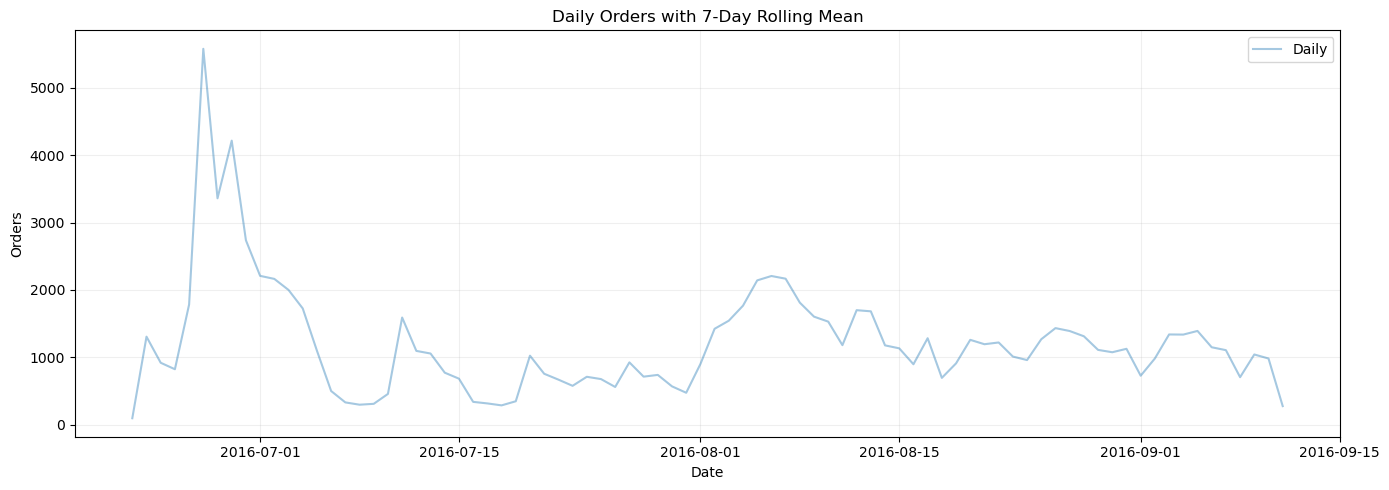

In [23]:
orders_per_day = df.groupby('order_date').size().reset_index(name='orders')

plt.figure(figsize=(14,5))
sns.lineplot(data=orders_per_day, x='order_date', y='orders', alpha=0.4, label='Daily')
plt.title("Daily Orders with 7-Day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.grid(alpha=0.2)
plt.tight_layout()

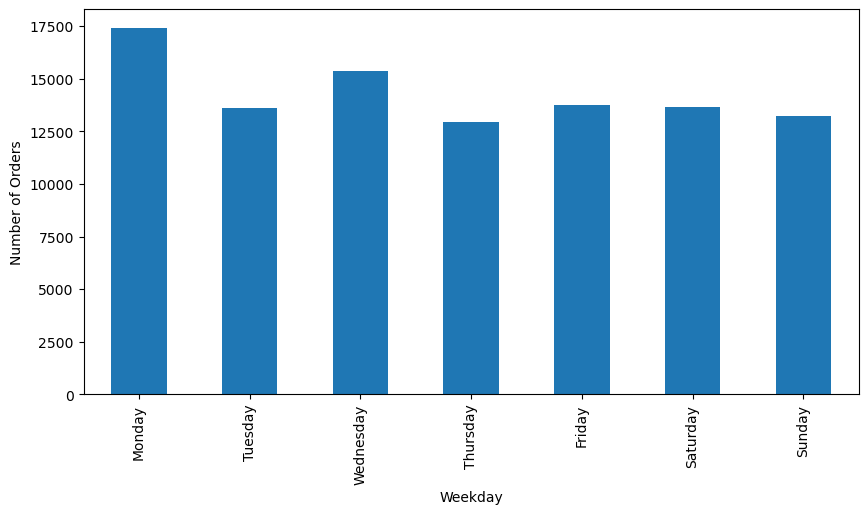

In [25]:
# Orders by weekend

df['order_weekday'] = df['order_date'].dt.day_name()
orders_per_weekday = df.groupby('order_weekday').size().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,5))
orders_per_weekday.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.show()

In [26]:
df['order_month']= df['order_date'].dt.month

In [27]:
df.head(4)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.90,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6
1,2016-06-22,NaT,337,152,grey,30,19.95,Mrs,Saxony,2016-06-23,0,0,47,Wednesday,6
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6


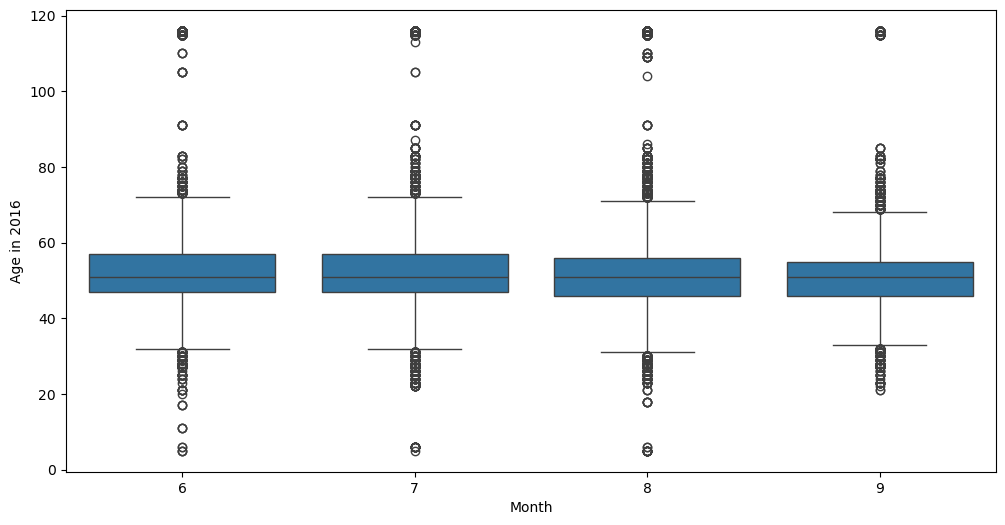

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='order_month', y='age_2016',data=df)
plt.xlabel('Month')
plt.ylabel('Age in 2016')
plt.show()

In [29]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.90,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6
1,2016-06-22,NaT,337,152,grey,30,19.95,Mrs,Saxony,2016-06-23,0,0,47,Wednesday,6
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6


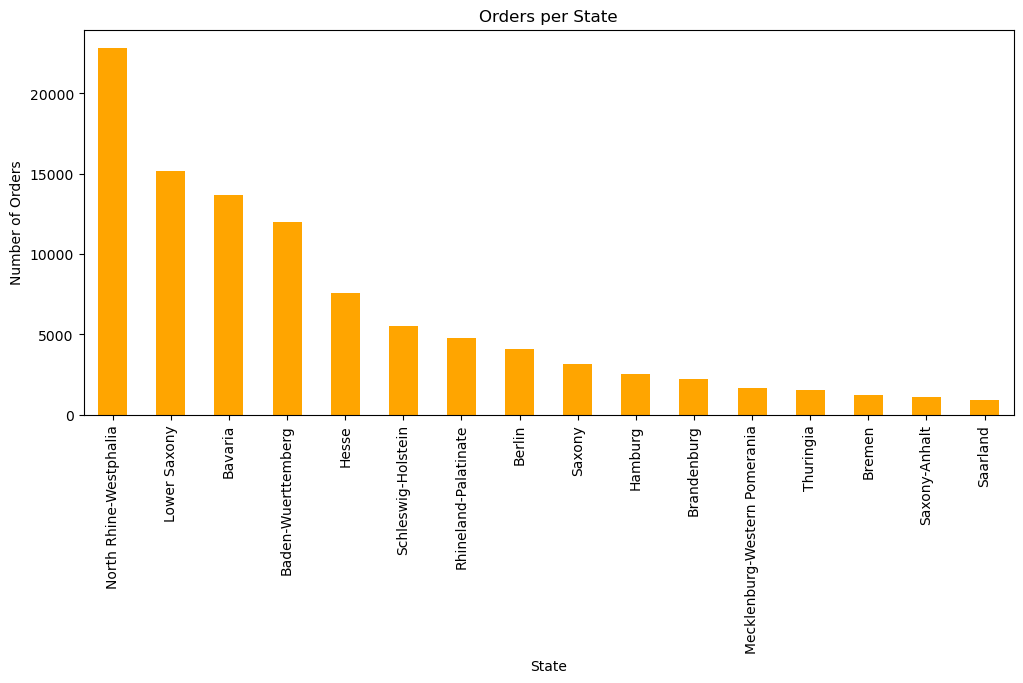

In [30]:
order_per_state = df.groupby('user_state').size().sort_values(ascending=False)
plt.figure(figsize=(12,5))
order_per_state.plot(kind='bar', color='orange')
plt.title('Orders per State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()

In [31]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.90,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6
1,2016-06-22,NaT,337,152,grey,30,19.95,Mrs,Saxony,2016-06-23,0,0,47,Wednesday,6
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6


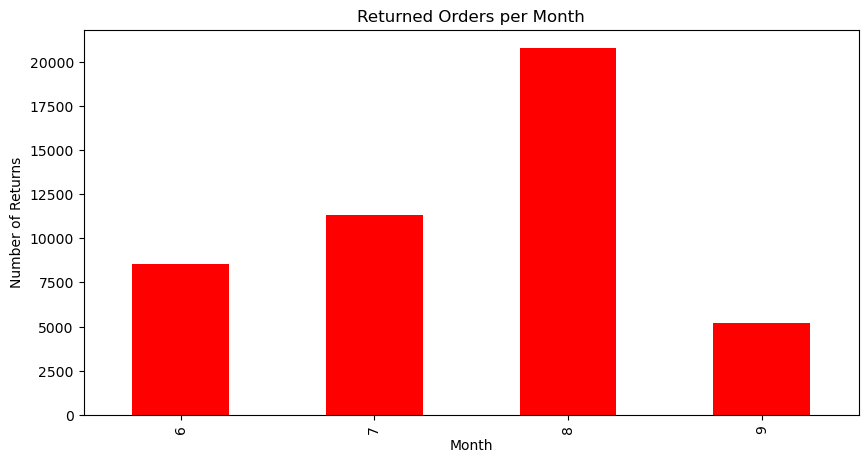

In [32]:
returns_per_month = df.groupby('order_month')['return'].sum()
plt.figure(figsize=(10,5))
returns_per_month.plot(kind='bar', color='red')
plt.title('Returned Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.show()

## 2.Delivery Date

In [33]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.90,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6
1,2016-06-22,NaT,337,152,grey,30,19.95,Mrs,Saxony,2016-06-23,0,0,47,Wednesday,6
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6


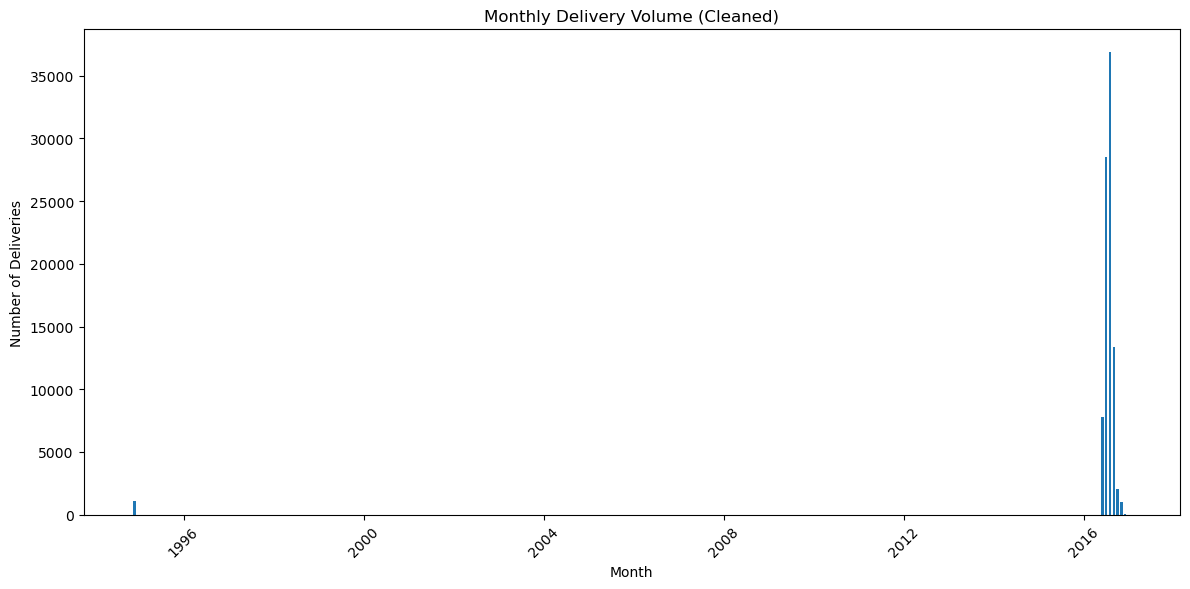

In [34]:
df["delivery_month"] = df["delivery_date"].dt.to_period("M")
monthly_counts = df.groupby("delivery_month").size().reset_index(name="count")

monthly_counts["delivery_month"] = monthly_counts["delivery_month"].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.bar(monthly_counts["delivery_month"], monthly_counts["count"], width=20)
plt.xlabel("Month")
plt.ylabel("Number of Deliveries")
plt.title("Monthly Delivery Volume (Cleaned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df['delivery_date'].dt.year

0        2016.0
1           NaN
2        2016.0
3        2016.0
4        2016.0
          ...  
99995    2016.0
99996    2016.0
99997    1994.0
99998    1994.0
99999    2016.0
Name: delivery_date, Length: 100000, dtype: float64

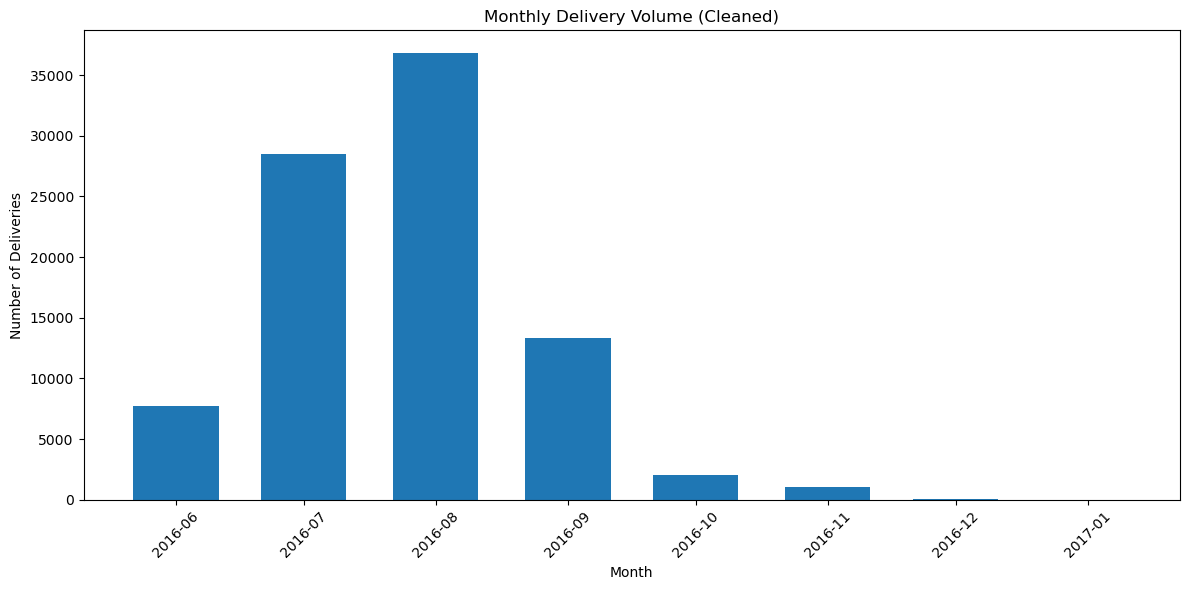

In [36]:
#df["delivery_date"] = pd.to_datetime(df["delivery_date"], errors="coerce")
df = df[(df["delivery_date"].dt.year >= 2014) & (df["delivery_date"].dt.year <= 2021)]
df["delivery_month"] = df["delivery_date"].dt.to_period("M")
monthly_counts = df.groupby("delivery_month").size().reset_index(name="count")
monthly_counts["delivery_month"] = monthly_counts["delivery_month"].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts["delivery_month"], monthly_counts["count"], width=20)
plt.xlabel("Month")
plt.ylabel("Number of Deliveries")
plt.title("Monthly Delivery Volume (Cleaned)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
df.head(4)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


## Item ID

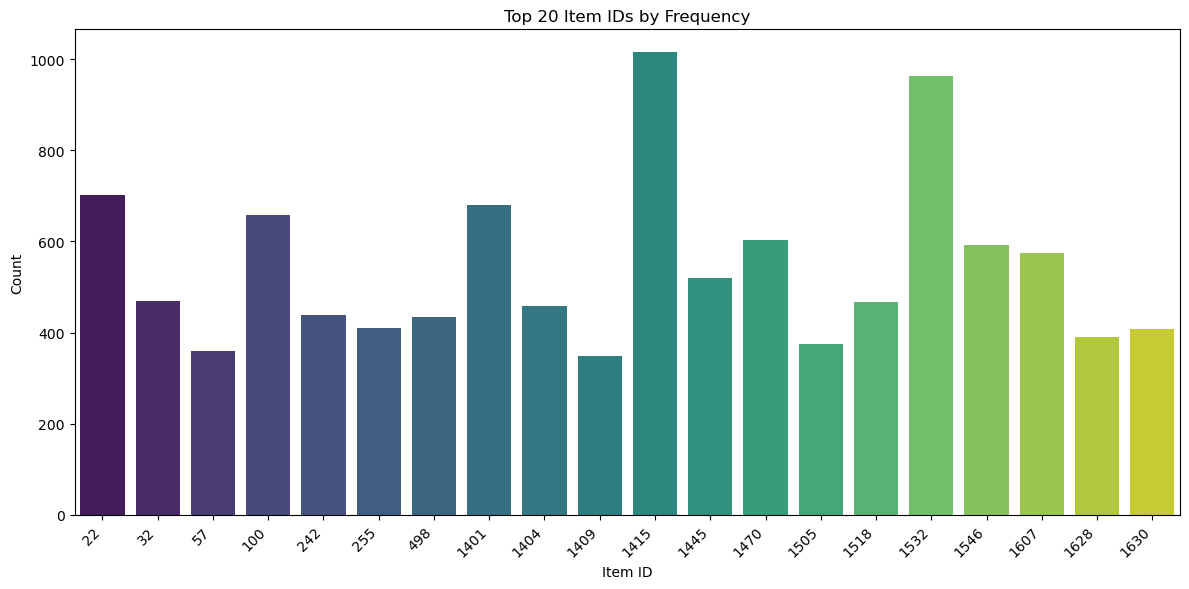

In [38]:
top_items = df.groupby('item_id').size().reset_index(name='count').sort_values('count', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(data=top_items, x='item_id',y='count',palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item ID')
plt.ylabel('Count')
plt.title('Top 20 Item IDs by Frequency')
plt.tight_layout()
plt.show()

In [39]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


In [40]:
df['item_size'].value_counts()

item_size
l       11234
xl       9959
m        9358
xxl      8090
40       6847
        ...  
3132        1
4034        1
84          1
3834        1
12+         1
Name: count, Length: 100, dtype: int64

In [41]:
df['item_size'].nunique()

100

In [42]:
name = ['L', 'XL', 'M', 'XXL', '40', '39', '38', 'Unsized', '42', '41']

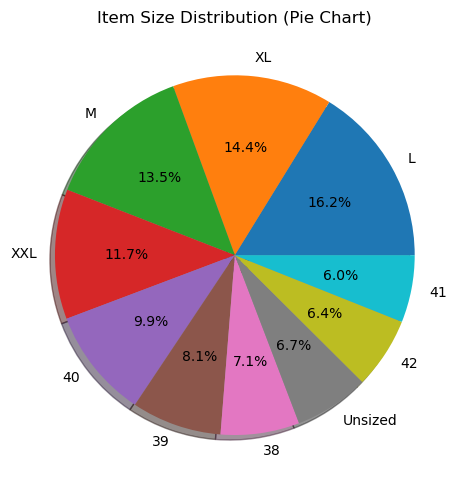

In [43]:
size_count = df['item_size'].value_counts().head(10)
plt.figure(figsize=(5,5))
plt.pie(size_count, labels=name, autopct='%1.1f%%', shadow=True, )
plt.title('Item Size Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

In [44]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


## Item Color

In [45]:
df['item_color'].value_counts().head(20)

item_color
black         16820
blue           9500
brown          7873
grey           7833
red            6404
green          5029
purple         3449
petrol         3392
white          2828
anthracite     2555
ocher          2061
berry          1901
olive          1881
mocca          1762
denim          1705
stained        1327
ash            1262
aubergine      1080
dark denim      942
pink            900
Name: count, dtype: int64

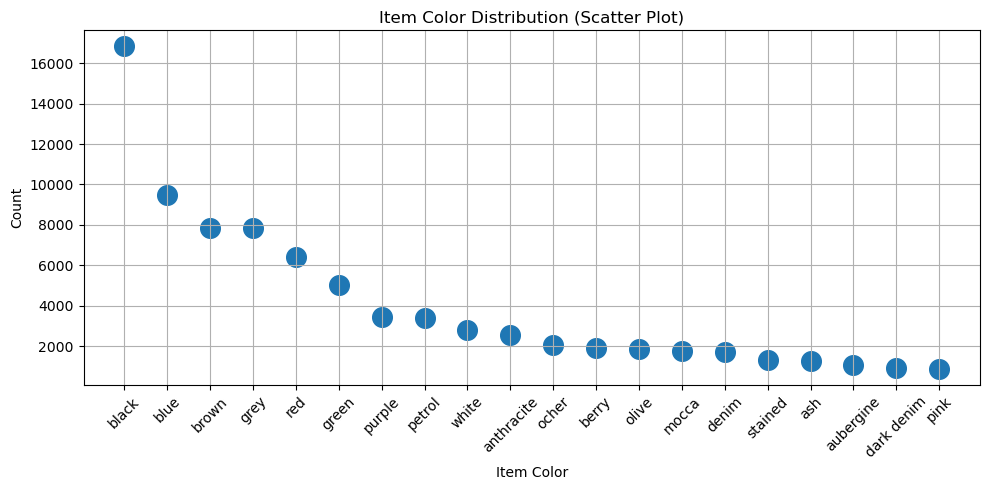

In [46]:
color_counts = df['item_color'].value_counts().head(20)
plt.figure(figsize=(10, 5))
plt.scatter(color_counts.index.astype(str), color_counts.values, s=200)
plt.xlabel('Item Color')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Item Color Distribution (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


## Brand ID

In [48]:
df['brand_id'].value_counts().head(20)

brand_id
3      10378
1       7369
37      4493
5       4097
11      4023
20      2650
6       2410
17      2194
43      1781
46      1765
38      1751
29      1738
42      1738
28      1661
49      1570
14      1515
113     1461
40      1428
47      1276
25      1184
Name: count, dtype: int64

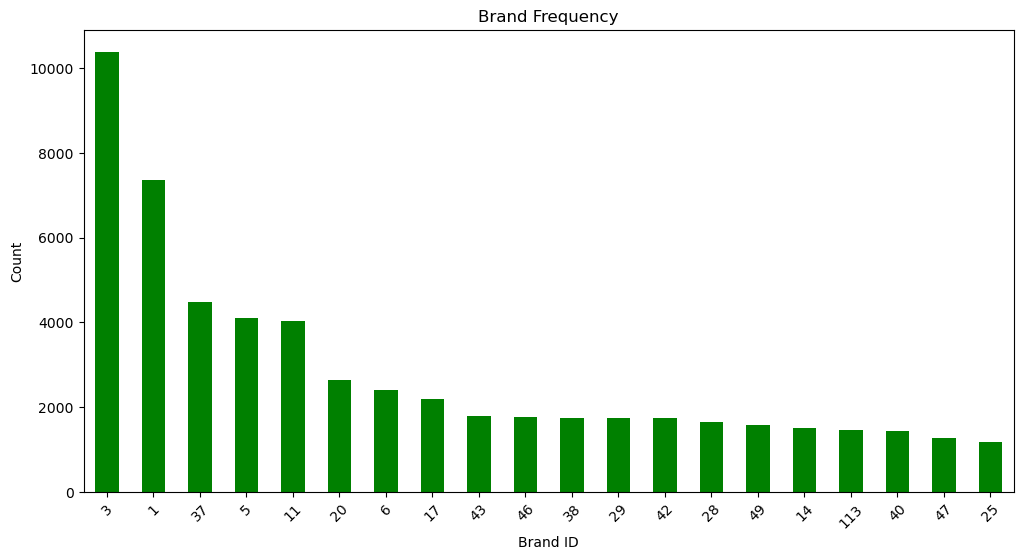

In [49]:
plt.figure(figsize=(12,6))
df['brand_id'].value_counts().head(20).plot(kind='bar',color='green')
plt.xticks(rotation=45)
plt.title('Brand Frequency')
plt.xlabel('Brand ID')
plt.ylabel('Count')
plt.show()

## Item_Price

In [50]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


In [51]:
avg_price_user = df.groupby('user_title')['item_price'].mean().reset_index()
avg_price_user

,user_title,item_price
0,Company,60.857480
1,Family,75.758567
2,Mr,76.624570
3,Mrs,65.294248
4,not reported,52.536316


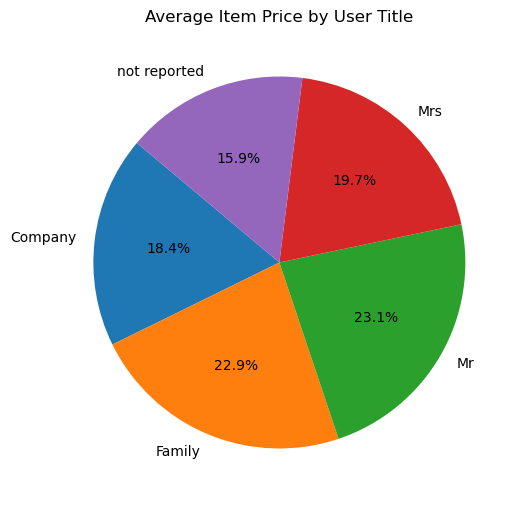

In [52]:
plt.figure(figsize=(6,8))
plt.pie(avg_price_user['item_price'], labels=avg_price_user['user_title'], autopct='%1.1f%%',startangle=140)
plt.title('Average Item Price by User Title')
plt.show()

In [53]:
user_stats = df.groupby('user_title')['item_price'].agg(
    ['count','mean','median','min','max','std']
)
user_stats

,count,mean,median,min,max,std
user_title,,,,,,
Company,127,60.857480,49.9,9.9,219.90,40.639669
Family,321,75.758567,59.9,0.0,329.90,57.217202
Mr,3398,76.624570,59.9,0.0,399.95,56.682465
Mrs,85669,65.294248,49.9,0.0,999.00,47.534583
not reported,95,52.536316,49.9,0.0,180.00,36.006758


In [54]:
df.head(3)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06


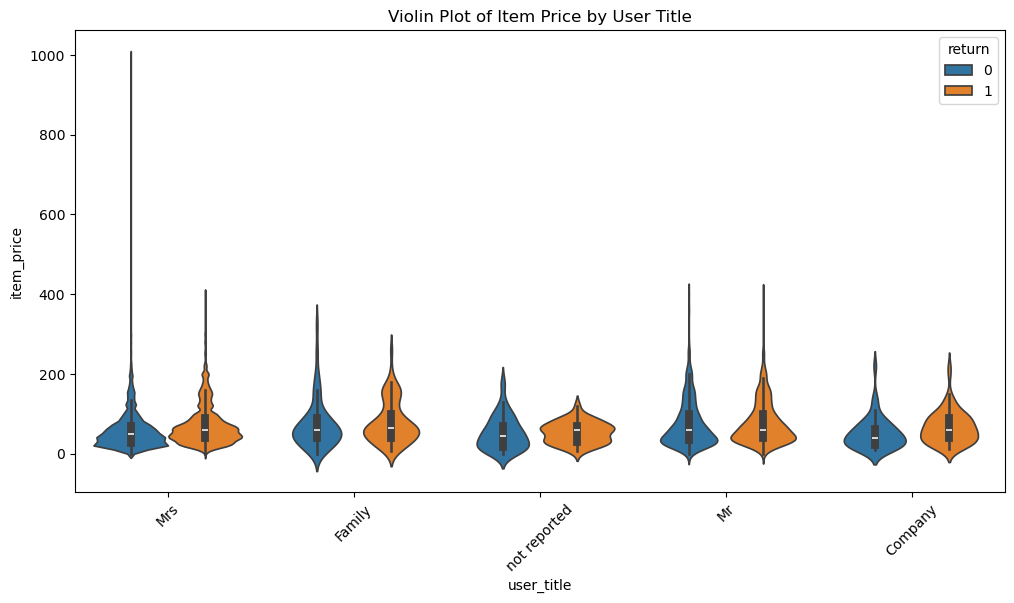

In [55]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='user_title', y='item_price', hue='return')
plt.xticks(rotation=45)
plt.title('Violin Plot of Item Price by User Title')
plt.show()

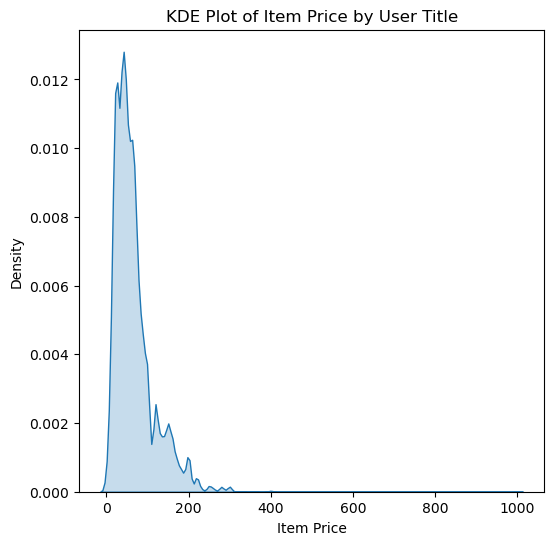

In [56]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=df, x='item_price', fill=True)
plt.title('KDE Plot of Item Price by User Title')
plt.xlabel('Item Price')
plt.show()

In [57]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


In [58]:
state_counts = df.groupby('user_state').size().sort_values(ascending=False).reset_index(name='count')

In [59]:
state_counts

,user_state,count
0,North Rhine-Westphalia,20492
1,Lower Saxony,13551
2,Bavaria,12253
3,Baden-Wuerttemberg,10708
4,Hesse,6835
5,Schleswig-Holstein,4974
6,Rhineland-Palatinate,4342
7,Berlin,3612
8,Saxony,2850
9,Hamburg,2188


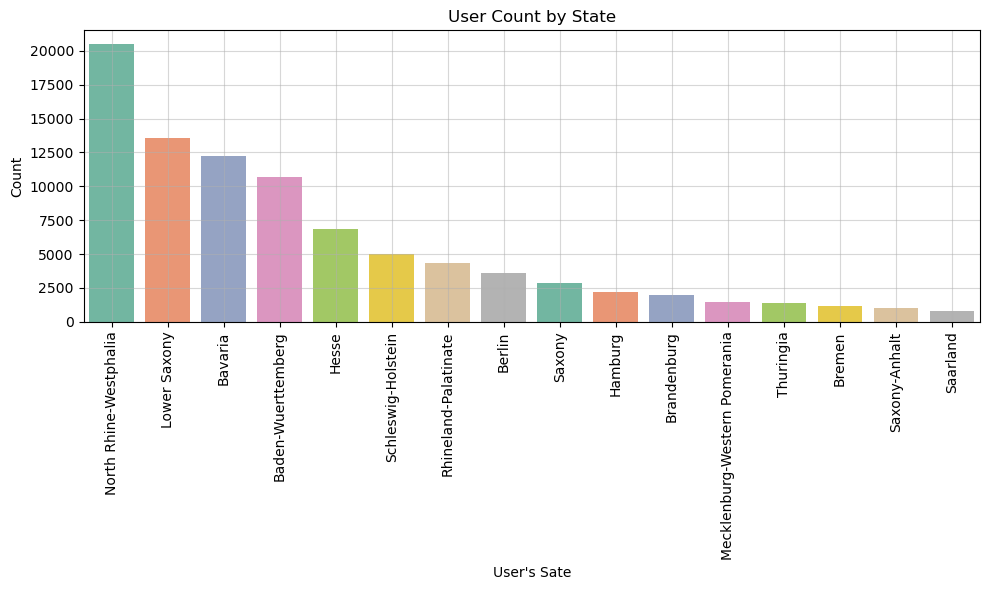

In [60]:
state_counts = df.groupby('user_state').size().sort_values(ascending=False).reset_index(name='count')
plt.figure(figsize=(10,6))
sns.barplot(x='user_state', y='count', data= state_counts,palette='Set2')
plt.xlabel("User's Sate")
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.grid(alpha=0.5)
plt.title('User Count by State')
plt.tight_layout()
plt.show()

In [61]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06


## User Registration Date

In [62]:
df['reg_year'] = df['user_reg_date'].dt.year
df['reg_month'] = df['user_reg_date'].dt.month
df['reg_month_name'] = df['user_reg_date'].dt.month_name()
df['reg_day'] = df['user_reg_date'].dt.day

In [63]:
df.head(3)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06,2016,6,June,23
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06,2015,3,March,15


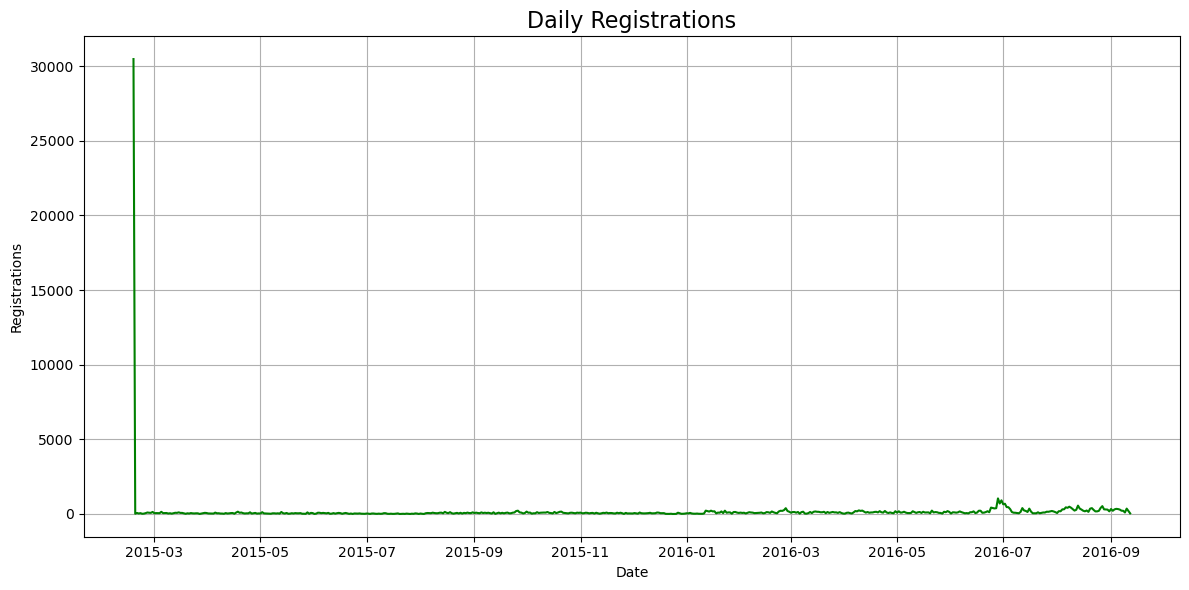

In [64]:
reg = df['user_reg_date'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(reg,color='green')
plt.title("Daily Registrations", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Registrations")
plt.grid()
plt.tight_layout()
plt.show()

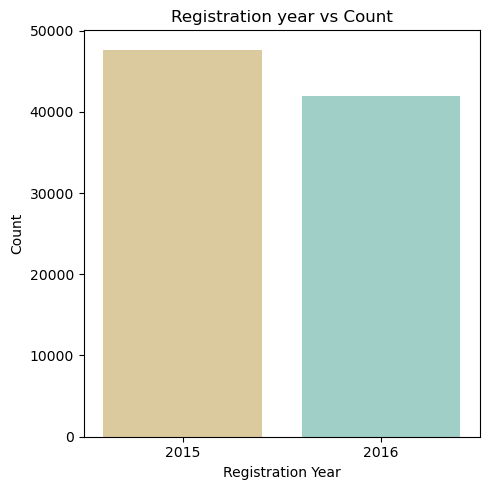

In [65]:
plt.figure(figsize=(5,5))
year = df.groupby('reg_year').size().reset_index(name='count')
sns.barplot(data=year, x='reg_year', y='count', palette='BrBG')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.title('Registration year vs Count')
plt.tight_layout()
plt.show()

In [66]:
year_2015 = df[df['reg_year'] == 2015]
year_2016 = df[df['reg_year'] == 2016]

In [67]:
year_2015['reg_month'] = pd.to_datetime(year_2015['reg_month'], format='%m')
year_2016['reg_month'] = pd.to_datetime(year_2016['reg_month'], format='%m')

In [68]:
year_2015['month_name'] = year_2015['reg_month'].dt.month_name()
year_2016['month_name'] = year_2016['reg_month'].dt.month_name()

In [69]:
year_2016.head(5)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,...,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day,month_name
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,...,1,47,Wednesday,6,2016-06,2016,1900-06-01,June,23,June
11,2016-06-22,2016-06-27,212,l,grey,5,39.9,Mrs,Lower Saxony,2016-06-23,...,1,51,Wednesday,6,2016-06,2016,1900-06-01,June,23,June
12,2016-06-22,2016-06-27,378,l,black,5,59.9,Mrs,Lower Saxony,2016-06-23,...,1,51,Wednesday,6,2016-06,2016,1900-06-01,June,23,June
13,2016-06-22,2016-06-27,222,l,black,3,29.9,Mrs,Lower Saxony,2016-06-23,...,1,51,Wednesday,6,2016-06,2016,1900-06-01,June,23,June
14,2016-06-23,2016-06-26,2,xxl,mocca,2,19.9,Mrs,North Rhine-Westphalia,2016-03-24,...,1,54,Thursday,6,2016-06,2016,1900-03-01,March,24,March


In [70]:
month_2015 = year_2015.groupby('reg_month').size().reset_index(name='count_2015')
month_2016 = year_2016.groupby('reg_month').size().reset_index(name='count_2016')

In [71]:
month_2015['month_name'] = month_2015['reg_month'].dt.month_name()
month_2015['month_name'] = month_2015['month_name'].sort_index()

In [72]:
month_2016['month_name'] = month_2016['reg_month'].dt.month_name()
month_2016['month_name'] = month_2016['month_name'].sort_index()

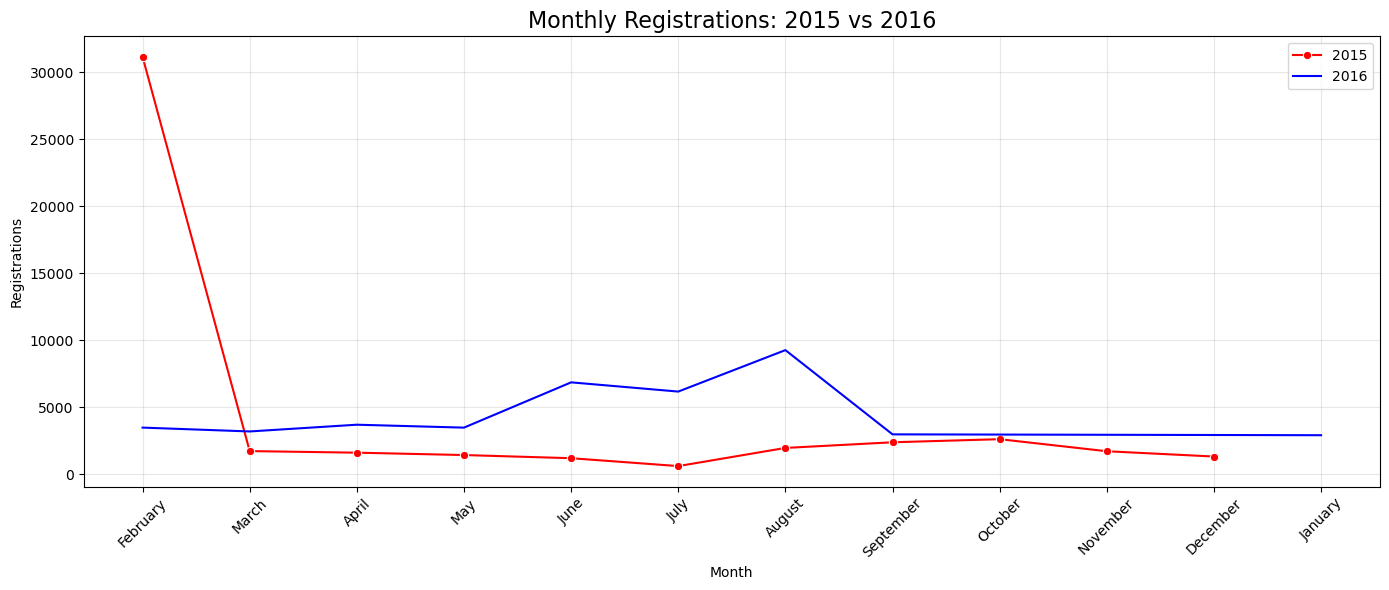

In [73]:
plt.figure(figsize=(14,6))
sns.lineplot(data=month_2015, x='month_name', y='count_2015', label='2015',marker='o', color='red')
sns.lineplot(data=month_2016, x='month_name', y='count_2016', label='2016',markers='*', color='blue')
plt.title("Monthly Registrations: 2015 vs 2016", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Registrations")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [74]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06,2016,6,June,23
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06,2015,3,March,15
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15


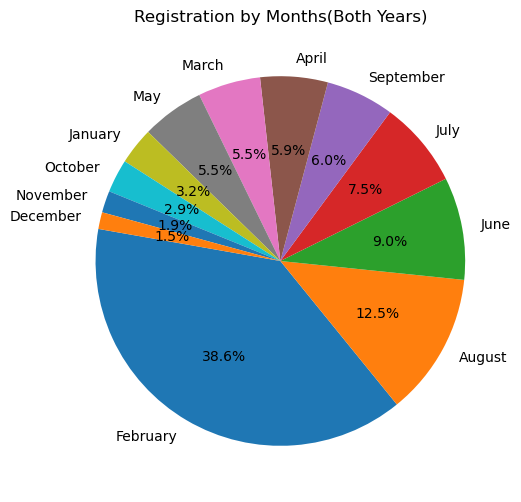

In [75]:
month_counts = df['reg_month_name'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=170)
plt.title("Registration by Months(Both Years)")
plt.show()

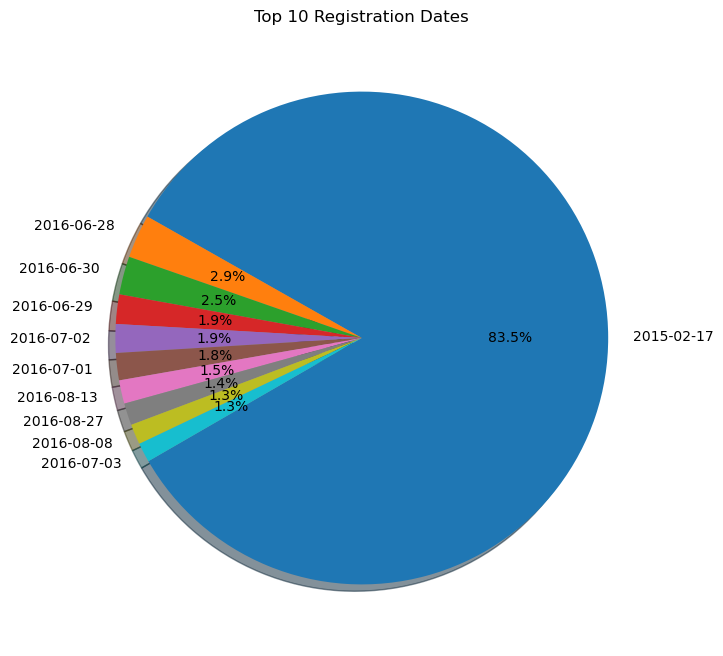

In [76]:
registrations_over_time = df.groupby('user_reg_date').size().sort_values(ascending=False).head(10)
top_dates = registrations_over_time
plt.figure(figsize=(8,8))
plt.pie(top_dates, autopct='%1.1f%%', startangle=210, labels=top_dates.index.strftime('%Y-%m-%d'), shadow=True)
plt.title("Top 10 Registration Dates")
plt.show()

In [77]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06,2016,6,June,23
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06,2015,3,March,15
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15


In [78]:
return_percentage = df['return'].value_counts(normalize=True) * 100
return_percentage = return_percentage.round(1)
return_percentage

return
1    50.7
0    49.3
Name: proportion, dtype: float64

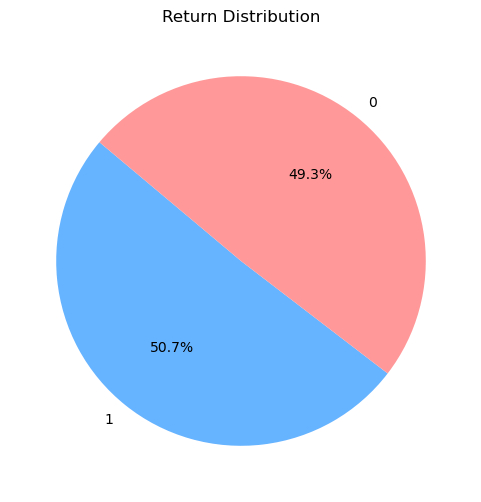

In [79]:
plt.figure(figsize=(6,6))
plt.pie(
    return_percentage,
    labels=return_percentage.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#ff9999']
)
plt.title("Return Distribution")
plt.show()


In [80]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06,2016,6,June,23
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06,2015,3,March,15
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15


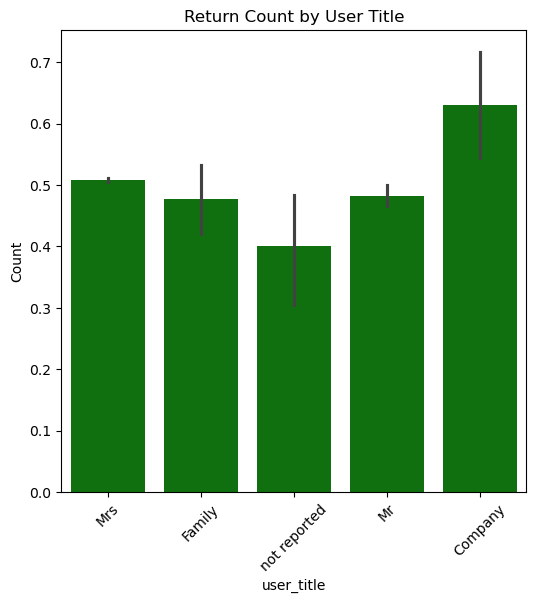

In [81]:
plt.figure(figsize=(6,6))
sns.barplot(data=df, x='user_title', y='return', color='green')
plt.title("Return Count by User Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

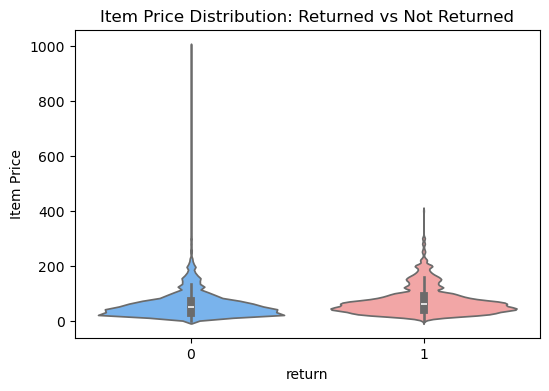

In [82]:
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='return', y='item_price', palette=['#66b3ff','#ff9999'])
plt.title("Item Price Distribution: Returned vs Not Returned")
plt.ylabel("Item Price")
plt.show()

In [83]:
df.head()

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_title,user_state,user_reg_date,return,is_delivered,age_2016,order_weekday,order_month,delivery_month,reg_year,reg_month,reg_month_name,reg_day
0,2016-06-22,2016-06-27,643,38,navy,30,49.9,Mrs,Saxony,2016-06-23,0,1,47,Wednesday,6,2016-06,2016,6,June,23
2,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
3,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,Mrs,Baden-Wuerttemberg,2015-03-15,0,1,46,Wednesday,6,2016-06,2015,3,March,15
4,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15
5,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,Mrs,Baden-Wuerttemberg,2015-03-15,1,1,46,Wednesday,6,2016-06,2015,3,March,15


In [84]:
df.columns

Index(['order_date', 'delivery_date', 'item_id', 'item_size', 'item_color',
       'brand_id', 'item_price', 'user_title', 'user_state', 'user_reg_date',
       'return', 'is_delivered', 'age_2016', 'order_weekday', 'order_month',
       'delivery_month', 'reg_year', 'reg_month', 'reg_month_name', 'reg_day'],
      dtype='object')

In [85]:
df.drop('is_delivered', axis=1, inplace=True)

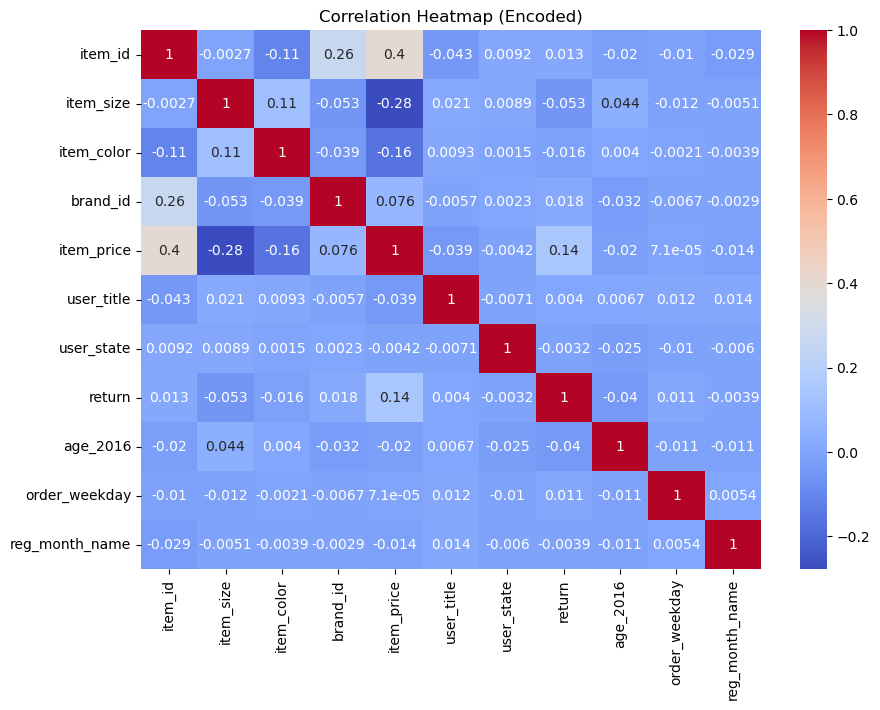

In [86]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

numeric_encoded = df_encoded.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Encoded)")
plt.show()


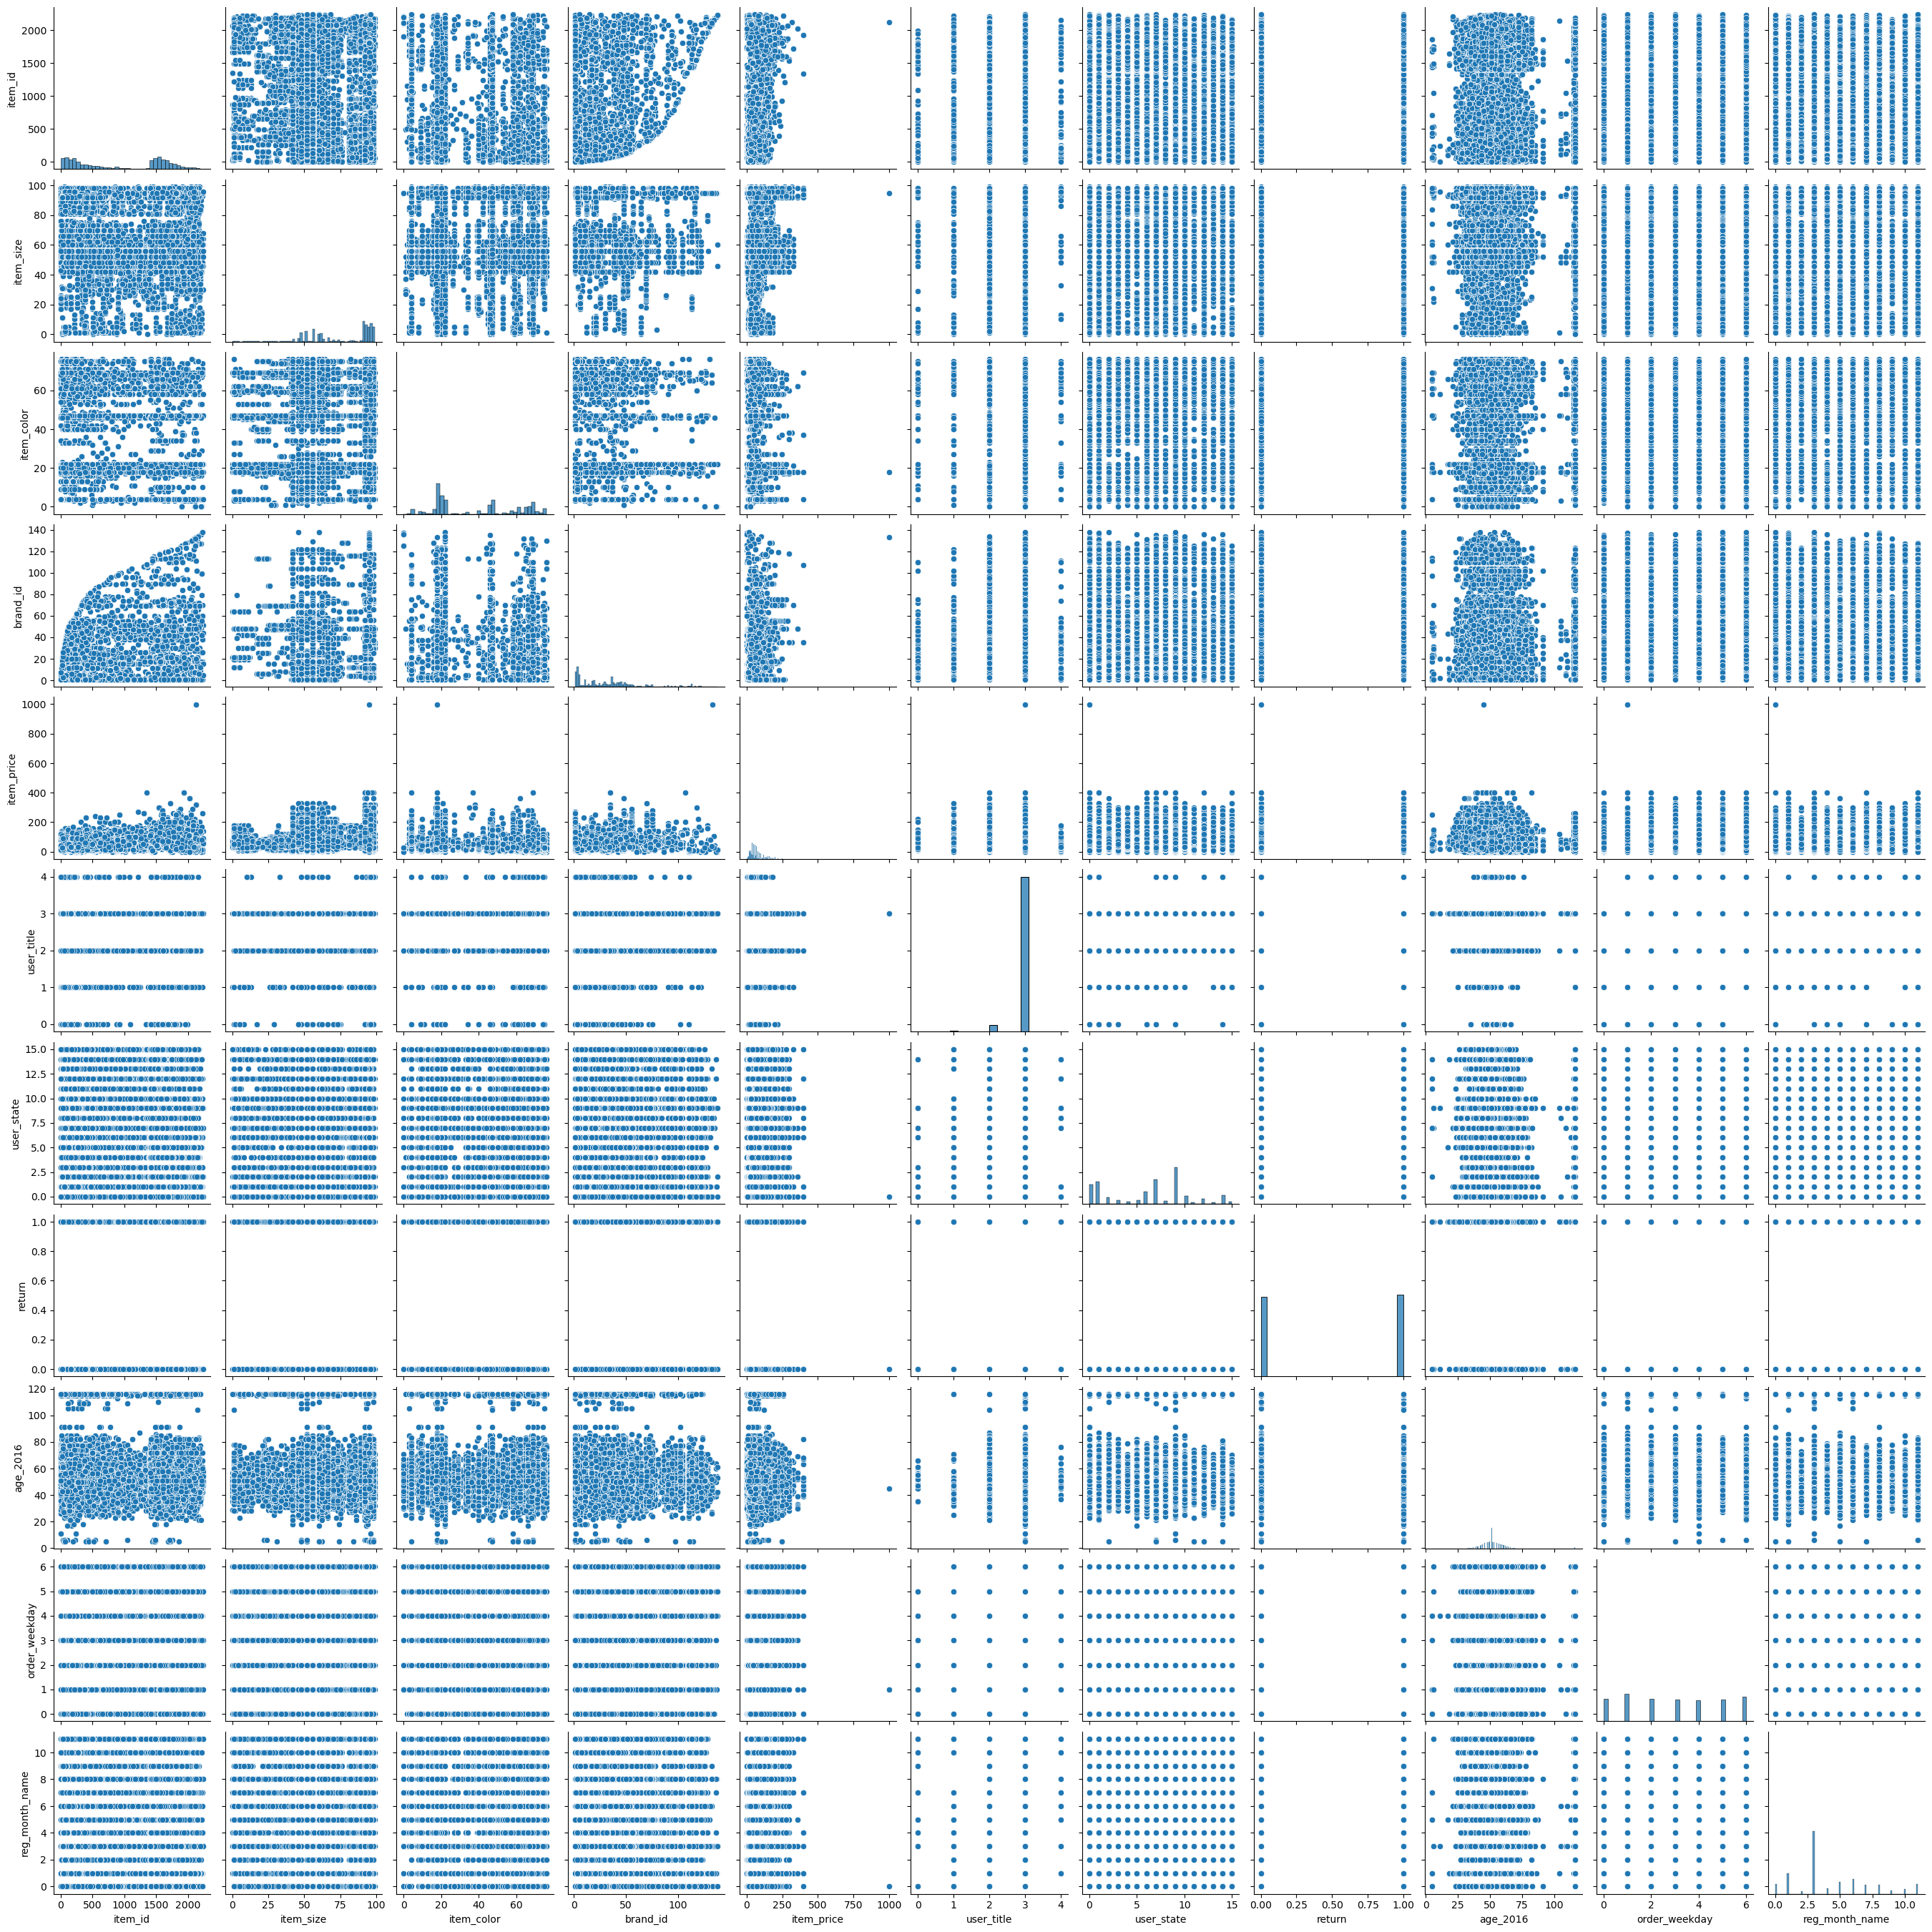

In [87]:
sns.pairplot(numeric_encoded)
plt.show()